In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *


In [2]:
Temperatures=pd.read_csv("Measure_data.csv")
Electric_energy=pd.read_csv("Pressure_data_40min.csv")

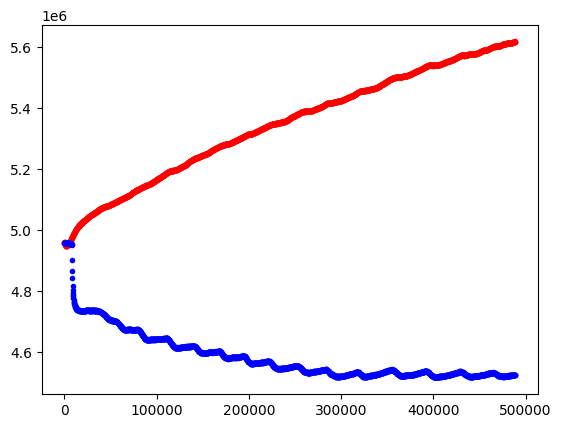

In [3]:
#calculating the whole energy
energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]*60
all_energy=energy.sum()
#CHANNEL0 for the hot reservoir
plt.scatter(np.linspace(0, all_energy, 2400), (Temperatures["CHANNEL0"]+273.15)*4*4182, marker=".", color="red")
plt.scatter(np.linspace(0, all_energy, 2400), (Temperatures["CHANNEL4"]+273.15)*4*4182, marker=".", color="blue")
plt.show()

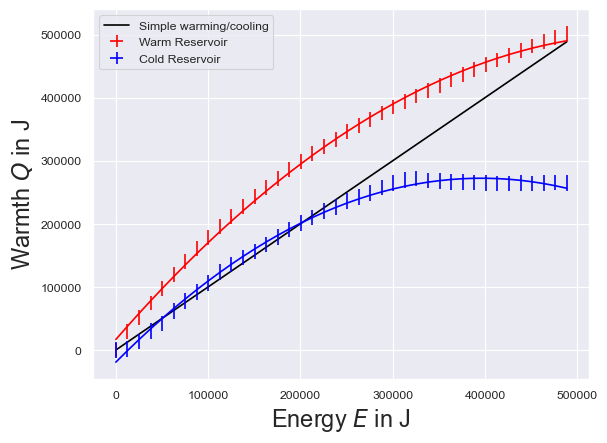

In [19]:
mass_red=4.28-0.32 #kg
mass_blue=4.52-0.34 #kg
mass_uncert=np.sqrt(2*0.01**2) #kg
temps_hot=[]
for i in range(40):
    temps_hot.append(abs(Temperatures["CHANNEL1"][60*i]-Temperatures["CHANNEL1"][0])*mass_red*4182)
temps_hot=np.array(temps_hot)


temps_cold=[]
for i in range(40):
    temps_cold.append(abs(Temperatures["CHANNEL5"][60*i]-Temperatures["CHANNEL5"][0])*mass_blue*4182)
temps_cold=np.array(temps_cold)

#for both temperatures
temp_err=np.sqrt(2*0.5**2)
temps_hot_uncert=np.sqrt((temp_err*mass_red*4182)**2) #+ (temps_hot*mass_uncert*4182)**2)
temps_cold_uncert=np.sqrt((temp_err*mass_blue*4182)**2) #+ (temps_cold*mass_uncert*4182)**2)


energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]*60
all_energy=energy.sum()

energies=np.linspace(0, all_energy, 40)
energies_uncert=np.ones(40)*np.sqrt((0.1*60)**2 + (0.01*60)**2)

sns.set_theme(style="darkgrid")
sns.set_context("paper")
#plt.scatter(energies, temps_hot, marker="+", color="red", label="Warm Reservoir")
#plt.scatter(energies, temps_cold, marker="+", color="blue", label="Cold Reservoir")


def myfunction(x):
  return 1*x 
  #60 because we are actually having to work with the intervalls of 60 seconds

mymodel = list(map(myfunction, energies))
plt.plot(energies, mymodel, label="Simple warming/cooling", color="black")

model_hot = np.poly1d(np.polyfit(energies, temps_hot, 2))
plt.errorbar(energies, temps_hot, yerr=temps_hot_uncert, xerr=energies_uncert, color="red", label="Warm Reservoir", fmt="None")
plt.plot(energies, model_hot(energies), color="red")

eff_coef_hot=[model_hot(energies[5])/energies[5],
              model_hot(energies[15])/energies[15],
              model_hot(energies[35])/energies[35]]

model_cold = np.poly1d(np.polyfit(energies, temps_cold, 2))
plt.errorbar(energies, temps_cold, yerr=temps_cold_uncert, xerr=energies_uncert, color="blue", label="Cold Reservoir", fmt="None")
plt.plot(energies, model_cold(energies), color="blue")

eff_coef_cold=[model_cold(energies[5])/energies[5],
              model_cold(energies[15])/energies[15],
              model_cold(energies[35])/energies[35]]

#mymodel = list(map(myfunction2, energies))
#plt.plot(energies, mymodel, label="Simple cooling", color="cyan")

plt.xlabel("Energy $E$ in J", size=17)
plt.ylabel("Warmth $Q$ in J", size=17)
plt.legend()
#plt.savefig("Warmth_energy.png", dpi=500, bbox_inches="tight")
plt.show()

In [ ]:
mass_uncert=np.sqrt(2*0.01**2) #kg
mass_red=ufloat(4.28-0.32, mass_uncert) #kg
mass_blue=ufloat(4.52-0.34, mass_uncert) #kg

temps_hot=[]
for i in range(40):
    temps_hot.append(abs(ufloat(Temperatures["CHANNEL1"][60*i]-Temperatures["CHANNEL1"][0], np.sqrt(2*0.5**2)))*mass_red*4182)
temps_hot=np.array(temps_hot)


temps_cold=[]
for i in range(40):
    temps_cold.append(abs(ufloat(Temperatures["CHANNEL5"][60*i]-Temperatures["CHANNEL5"][0], np.sqrt(2*0.5**2)))*mass_blue*4182)
temps_cold=np.array(temps_cold)

energies=np.linspace(0, all_energy, 40)
energy_uncert=np.sqrt((0.1*60)**2 + (0.01*60)**2)



EX2 finding the effitiency coefficient through the Polynomial of 2. grade, already done in the previous excercise, with help of a polynomial fit - we simply found the rate of growth of a function at 5, 15, 35 minutes and use that as our 

In [5]:
eff_coef_hot

[1.8754258140176565, 1.5108458328639987, 1.0909803761765604]

In [6]:
eff_coef_cold

[1.0036344114971671, 0.9766194048645599, 0.5869242762509508]

In [7]:
from sklearn.metrics import r2_score
print(r2_score(temps_hot, model_hot(energies)))
print(r2_score(temps_cold, model_cold(energies)))


0.9981327899657384
0.995886027277814


Those results prove a very good fit, even though our data has a substantial difference in comparisson to expected values.